# <center><font face="arial" size="5" color=#0101DF>NUMERIQUE ET SCIENCES INFORMATIQUES 1ère NSI</font></center>

## <font color=#013ADF>Séquence N° 9 : Algorithme des k plus proches voisins (KPPV ou KNN en Anglais)</font>

<div class="alert alert-danger" role="alert">
    
Les objectifs de cette séquence sont :
- Écrire un algorithme qui prédit la classe d'un élément en fonction de la calsse majoritaire de ses k plus proches voisins.


### 1- L'intelligence artificielle

<div class="alert alert-success">
<img src="Images/warning.png" alt="logo CR" width=5% align=left>

L'intelligence artificielle  a trouvé son nom à la conférence de Dartmouth en 1956. Mais elle a débuté dès le début des années 1950 avec, notamment, les travaux d'*[Alan Turing](https://fr.wikipedia.org/wiki/Alan_Turing)* qui s'est posé la question de savoir si l'on pouvait faire penser un ordinateur.  

Il proposa pour cela un test, dit, *test de Turing*, dans  lequel une personne discute au travers d'un ordinateur et doit deviner  si son interlocuteur est une machine ou un être humain. Si elle n'y arrive pas, l'on pourra conclure qu'il est possible de  faire fonctionner un ordinateur avec des algorithmes de logique  semblables à notre manière de penser.

S'il y a encore quelques années il était très facile de deviner  qu'une machine nous parlait, aujourd'hui  dans des activités  nécessitant beaucoup de réflexion, l'ordinateur s'est montré plus fort que l'être humain, comme avec :

- La victoire en 1997 aux échecs du programme [Deep Blue d’IBM contre le champion du monde Garry Kasparov](https://fr.wikipedia.org/wiki/Deep_Blue_-_Kasparov_(1997,_partie_6))
- Le jeu de Go, où le programme [AlphaGo de Google a battu le champion du monde Lee SeDol](http://www.lemonde.fr/pixels/article/2016/03/09/comment-savoir-si-les-programmes-d-intelligence-artificielle-sont-vraiment-intelligents_4879177_4408996.html) en 2016
- La conduite automobile où les voitures sans chauffeur semblent plus sûres que celles conduites par des humains
- ...

L'intelligence artificielle a suscité et continue toujours de  susciter de nombreux espoirs pour l'amélioration de notre condition  humaine, mais le fait qu'elle arrive aujourd'hui dans certains domaines à nous égaler, voire à nous dépasser, suscite des inquiétudes.
    
Pour avoir une bonne notion de ce que l'on entend par IA, machine learning et deep learning, voici les liens vers des vidéos qu'il est préférable de visionner dans l'ordre :
    
https://www.youtube.com/watch?v=P-z3eAuV1kc

https://www.youtube.com/watch?v=trWrEWfhTVg

### 2- L'algorithme des k plus proches voisins (kppv) ou (k-nearest neighbors knn)

<div class="alert alert-success">
<img src="Images/warning.png" alt="logo CR" width=5% align=left>

"Dis-moi qui tu fréquentes, je te dirais qui tu es."

Le principe de l’algorithme des k plus proches voisins est basé le  fait que les objets d’un même type sont “proches” entre eux. Pour  quantifier la distance entre les objets, la grandeur couramment utilisée est la distance euclidienne.

L’algorithme permet ainsi de prédire l’appartenance d’un nouvel objet à une classe en fonction de ses distances avec ses voisins : elle  appartiendra à la classe majoritaire de ses voisins. Il s'agit donc d'un apprentissage supervisé.

Il s’agit d’un algorithme simple mais très efficace pour **classifier des données labellisées**.

</div>
<div class="alert alert-danger" role="alert">
    
Distance euclidienne ?

Soit 2 points du plan P : p<sub>1</sub>(x<sub>1</sub>,y<sub>1</sub>) et p<sub>2</sub>(x<sub>2</sub>,y<sub>2</sub>)
$$
D(p_1,p_2)=\sqrt{(x_1-x_2)² + (y_1-y_2)²}
$$
</div>

<div class="alert alert-warning">
<img src="Images/CR.png" alt="logo CR" width=5% align=right>

**Travail à faire** :

 Vous êtes banquier. Vous avez à décider si vous accordez ou non un prêt de 142 000 € à un client. Pour vous aidez dans votre choix, vous disposez d'un jeu de données concernant des clients qui ont remboursé leur prêt et d'autres qui ont eu des défauts de paiement (Voir fichier clients.csv).
 
 | ID client | Age  | Age normalisé | Montant prêt | Montant normalisé | Défaillance | Distance | Plus proche |
| :-------: | :--: | :-----------: | :----------: | :---------------: | :---------: | :------: | :---------: |
|     1     |  25  |     0,13      |   40 000 €   |       0,11        |      N      |   0,77   |   **10**    |
|     2     |  35  |     0,38      |   60 000 €   |       0,21        |      N      |   0,52   |    **7**    |
|     3     |  45  |     0,63      |   80 000 €   |       0,31        |      N      |   0,32   |    **1**    |
|     4     |  20  |     0,00      |   20 000 €   |       0,01        |      N      |   0,92   |   **11**    |
|     5     |  35  |     0,38      |  120 000 €   |       0,50        |      N      |   0,34   |    **2**    |
|     6     |  52  |     0,80      |   18 000 €   |       0,00        |      N      |   0,62   |    **8**    |
|     7     |  23  |     0,08      |   95 000 €   |       0,38        |      Y      |   0,67   |    **9**    |
|     8     |  40  |     0,50      |   62 000 €   |       0,22        |      Y      |   0,44   |    **6**    |
|     9     |  60  |     1,00      |  100 000 €   |       0,41        |      Y      |   0,37   |    **3**    |
|    10     |  48  |     0,70      |  220 000 €   |       1,00        |      Y      |   0,39   |    **5**    |
|    11     |  33  |     0,33      |  150 000 €   |       0,65        |      Y      |   0,38   |    **4**    |
|           |      |               |              |                   |             |          |             |
|           |      |               |              |                   |             |          |             |
|    12     |  48  |     0,70      |  142 000 €   |       0,61        |      ?      |          |             |
 

<img src="Images/pret.png" alt="pret" width=50% align=center>


1. Déterminer la distance normalisée entre tous les clients et le nouveau client.
On normalise les distances pour éviter l'influence d'un paramètre sur un autre.
    
Pour une valeur V :
$$V_{norm}=\frac{V -V_{min}}{V_{max}-V_{min}}$$

*Il s'agit une transformation linéaire qui permet de ramener la valeur normalisée entre 0 et 1, tout en gardant une relation avec les valeurs originales.*

2. Déterminer "k", le nombre de voisins à prendre en considération : prendre la valeur la plus proche de : $$\sqrt{nb client}$$

Nécessite d'importer le module math.sqrt de python qui était également nécessaire pour le calcul de la distance euclidienne.
    
3. Déterminer les clients k clients les plus proche
        clients 11-5-9
                 O-N-O
4. Décider si vous accordez le prêt ou non, en le justifiant
        Deux défaillances sur 3. Le prêt est donc refusé.
</div>

In [1]:
from math import sqrt
def arrondi(val):
    a=sqrt(val)
    if a-int(a)>0.5:
        topval=int(a)+1
    else:
        topval=int(a)
    return topval
v=arrondi(11)
print(v)

3


<div class="alert alert-warning">
<img src="Images/CR.png" alt="logo CR" width=5% align=right>

**Travail à faire** :

- Après ce travail manuel, nécessaire pour comprendre l'algorithme, vous allez réaliser un programme en python qui réalise le même travail.
- Pour les plus rapides, utiliser la feuille ressource sur "Matplotlib_scatter" pour afficher sur un graphe les points en 3 séries : O, N et ?.

</div>

In [2]:
import csv

def lecture_fichier(fichier):
    with open(fichier) as csv_file:
        lecteur= csv.DictReader(csv_file, delimiter=',')
        return [dict(ligne) for ligne in lecteur] # conversion des dictionnaires ordonnés en dictionnaires
lec=lecture_fichier("clientsoff.csv")
for c in lec:
    print(c)

{'ID client': '6', 'Age': '52', 'Montant (€)': '18000', 'V': '0', 'Défaillance': 'N'}
{'ID client': '4', 'Age': '20', 'Montant (€)': '20000', 'V': '0.00990099009901', 'Défaillance': 'N'}
{'ID client': '1', 'Age': '25', 'Montant (€)': '40000', 'V': '0.108910891089109', 'Défaillance': 'N'}
{'ID client': '2', 'Age': '35', 'Montant (€)': '60000', 'V': '0.207920792079208', 'Défaillance': 'N'}
{'ID client': '8', 'Age': '40', 'Montant (€)': '62000', 'V': '0.217821782178218', 'Défaillance': 'O'}
{'ID client': '3', 'Age': '45', 'Montant (€)': '80000', 'V': '0.306930693069307', 'Défaillance': 'N'}
{'ID client': '7', 'Age': '23', 'Montant (€)': '95000', 'V': '0.381188118811881', 'Défaillance': 'O'}
{'ID client': '9', 'Age': '60', 'Montant (€)': '100000', 'V': '0.405940594059406', 'Défaillance': 'O'}
{'ID client': '5', 'Age': '35', 'Montant (€)': '120000', 'V': '0.504950495049505', 'Défaillance': 'N'}
{'ID client': '12', 'Age': '48', 'Montant (€)': '142000', 'V': '0.613861386138614', 'Défaillance'

In [3]:
def conversion_type(table):
    newtable=[]
    for i in table:
        for c,v in i.items():
            try:
                v=float(v)
            except:
                pass
    return table
convtable=conversion_type(lec)
print(convtable)

[{'ID client': '6', 'Age': '52', 'Montant (€)': '18000', 'V': '0', 'Défaillance': 'N'}, {'ID client': '4', 'Age': '20', 'Montant (€)': '20000', 'V': '0.00990099009901', 'Défaillance': 'N'}, {'ID client': '1', 'Age': '25', 'Montant (€)': '40000', 'V': '0.108910891089109', 'Défaillance': 'N'}, {'ID client': '2', 'Age': '35', 'Montant (€)': '60000', 'V': '0.207920792079208', 'Défaillance': 'N'}, {'ID client': '8', 'Age': '40', 'Montant (€)': '62000', 'V': '0.217821782178218', 'Défaillance': 'O'}, {'ID client': '3', 'Age': '45', 'Montant (€)': '80000', 'V': '0.306930693069307', 'Défaillance': 'N'}, {'ID client': '7', 'Age': '23', 'Montant (€)': '95000', 'V': '0.381188118811881', 'Défaillance': 'O'}, {'ID client': '9', 'Age': '60', 'Montant (€)': '100000', 'V': '0.405940594059406', 'Défaillance': 'O'}, {'ID client': '5', 'Age': '35', 'Montant (€)': '120000', 'V': '0.504950495049505', 'Défaillance': 'N'}, {'ID client': '12', 'Age': '48', 'Montant (€)': '142000', 'V': '0.613861386138614', 'Dé

In [4]:
def delta():
    delta=[]
    for i in convtable:
        if i["ID client"]=='12':
            val=i["V"]
    for i in convtable:
        delta.append(float(i['V'])-float(val))
    return delta,float(val)
liste,val=delta()
print(liste)

[-0.613861386138614, -0.6039603960396039, -0.504950495049505, -0.40594059405940597, -0.39603960396039595, -0.306930693069307, -0.23267326732673294, -0.20792079207920794, -0.10891089108910901, 0.0, 0.039603960396039084, 0.38613861386138604]


In [5]:
def kppv():
    newl=[]
    for i in liste:
        newl.append(i)
    newl=sorted(newl, reverse=True)
    return newl
newl2=kppv()
print(newl2)

[0.38613861386138604, 0.039603960396039084, 0.0, -0.10891089108910901, -0.20792079207920794, -0.23267326732673294, -0.306930693069307, -0.39603960396039595, -0.40594059405940597, -0.504950495049505, -0.6039603960396039, -0.613861386138614]


In [6]:
def retour():
    idtable=[]
    for i in newl2:
        if i!=0.0:
            idtable.append(i+val)
    return idtable
idt=retour()
print(idt)

[1.0, 0.653465346534653, 0.504950495049505, 0.405940594059406, 0.381188118811881, 0.306930693069307, 0.21782178217821802, 0.207920792079208, 0.10891089108910901, 0.00990099009901002, 0.0]


In [7]:
def retourbis(idt=idt):
    listefin=[]
    for i in idt[1:4]:
        listefin.append(i)
    return listefin
listefin=retourbis()
print(listefin)

[0.653465346534653, 0.504950495049505, 0.405940594059406]


In [8]:
def idback(listefin):
    idc=[]
    defa=0
    ndefa=0
    for i in listefin:
        for e in convtable:
            if e["V"]==str(i):
                idc.append(e["ID client"])
                if e["Défaillance"]=="O":
                    defa+=1
                else:
                    ndefa+=1
                if defa>=ndefa:
                    verdict="de refuser le prêt"
                elif ndefa>defa:
                    verdict="d'accorder le prêt"
    return idc, verdict
idc, verdict=idback(listefin)
#print(idc)
print(f"Bonjour,\nCe mail fait suite à votre demande de prêt du 06/06/2021.\nAprès étude de votre dossier, la banque décidé {verdict}.\nNous restons à votre disposition si vous avez la moindre question !\n\nCordialement,\nVotre banquier.")
        

Bonjour,
Ce mail fait suite à votre demande de prêt du 06/06/2021.
Après étude de votre dossier, la banque décidé de refuser le prêt.
Nous restons à votre disposition si vous avez la moindre question !

Cordialement,
Votre banquier.


<img src="logo.png" alt="graphe de points" align=left width=14%><br/><br/>**L.PERROT - perrotl@caissedepargne.fr** <br/> **02 57 29 04 76**

<img src="Images/Résultats.png" alt="graphe de points" align=center width=80%>

<div class="alert alert-success" role="alert">

**Pour aller plus loin ...**

- La **bibliothèque** Python **Scikit Learn** propose un grand nombre d'algorithmes lié au machine learning (c'est sans aucun doute la bibliothèque la plus utilisée en machine learning). Parmi tous ces algorithmes, Scikit Learn propose l'algorithme des k plus proches voisins.

- Une seconde **bibliothèque** est couramment utilisée pour lire les données, il s'agit de **pandas**. Pandas fournit des structures de données puissantes et simples à utiliser, ainsi que les moyens d'opérer rapidement des opérations sur ces structures.
</div>

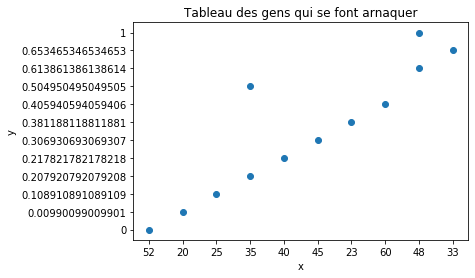

In [38]:
import matplotlib.pyplot as plt
x=[]
y=[]
for e in convtable:
    y.append(e["V"])
    x.append(e["Age"])

plt.scatter(x,y)

plt.title('Tableau des gens qui se font arnaquer')
plt.xlabel('x')
plt.ylabel('y')

#plt.savefig('ScatterPlot_01.png')
plt.show()